# Programming for Data Analysis Assignment

In [1]:
import numpy as np
import pandas as pd

# https://www.pgatour.com/stats/detail/120
df = pd.read_csv('pgatour_golfstats_2022-2023_averagescore.csv')
df

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
0,1,0,46046,Scottie Scheffler,68.629,6007,32.329,88
1,2,0,28237,Rory McIlroy,68.777,4411,-9.244,64
2,3,0,46970,Jon Rahm,69.037,4886,15.615,71
3,4,0,46717,Viktor Hovland,69.123,6065,17.843,88
4,5,0,48081,Xander Schauffele,69.127,5595,4.323,81
...,...,...,...,...,...,...,...,...
184,185,-2,51950,Max McGreevy,72.603,6170,73.869,86
185,186,-2,28420,Ryan Brehm,72.739,5740,79.134,80
186,187,-2,32662,Michael Gligic,72.775,4953,68.445,69
187,188,-2,27095,Nick Watney,72.936,5052,53.529,70


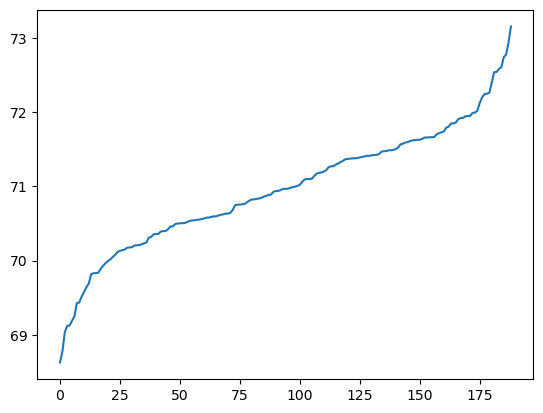

In [2]:
import matplotlib.pyplot as plt
x = df.AVG
plt.plot(df.AVG)
plt.show()

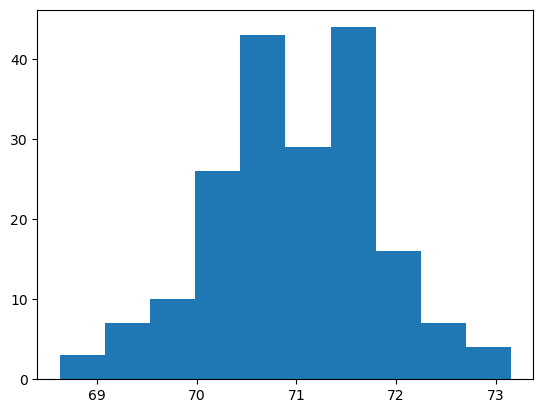

In [3]:
# Plot Average Score data from pgatour_golfstats_2022-2023_averagescore.csv
plt.hist(x, bins=10)
plt.show()

In [4]:
df.AVG

0      68.629
1      68.777
2      69.037
3      69.123
4      69.127
        ...  
184    72.603
185    72.739
186    72.775
187    72.936
188    73.153
Name: AVG, Length: 189, dtype: float64

In [5]:
std = df.AVG.std()
std

0.8301339718593281

In [6]:
mean = df.AVG.mean()
mean

70.96867724867725

In [7]:
df.describe()

,RANK,MOVEMENT,PLAYER_ID,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.957672,-0.449735,39114.994709,70.968677,5977.037037,53.245196,85.026455
std,54.705579,3.487647,10294.967774,0.830134,1123.886273,26.348952,16.241670
min,1.000000,-13.000000,12716.000000,68.629000,3198.000000,-18.811000,45.000000
25%,48.000000,-2.000000,31560.000000,70.461000,5217.000000,35.723000,74.000000
50%,94.000000,0.000000,36699.000000,70.966000,6065.000000,55.784000,86.000000
75%,142.000000,2.000000,48117.000000,71.524000,6799.000000,73.356000,96.000000
max,189.000000,19.000000,59018.000000,73.153000,8450.000000,106.517000,122.000000


In [8]:
count = df.count()
count

RANK                189
MOVEMENT            189
PLAYER_ID           189
PLAYER              189
AVG                 189
TOTAL STROKES       189
TOTAL ADJUSTMENT    189
TOTAL ROUNDS        189
dtype: int64

In [9]:
# Synthesize a random normal distribution for Average Score
# I choose mu of 70.96 because this is the average score in pgatour_golfstats_2022-2023_averagescore.csv
y = np.random.normal(mean,std,189)
y

array([70.48575838, 71.40167195, 70.74133158, 70.85906234, 69.93124631,
       70.70594392, 70.92547839, 70.57243723, 70.42786265, 70.4830489 ,
       70.77846374, 72.15096908, 70.61070867, 71.78214507, 71.07950133,
       70.93922455, 70.62859263, 70.06243984, 69.95234608, 71.13781919,
       70.7685608 , 70.91292834, 71.0438412 , 69.10785563, 72.04233593,
       70.3347294 , 69.85828066, 73.09050817, 71.68050485, 70.77703376,
       69.04512622, 70.43746044, 69.24390306, 70.83193589, 68.65960551,
       71.50767028, 69.65157279, 72.85843947, 70.79588951, 70.85601165,
       69.86018507, 69.13221907, 71.27344989, 71.21288093, 71.62963939,
       70.27505477, 70.96966752, 70.84019761, 69.22483985, 70.71064162,
       69.54181356, 71.0916815 , 72.22872783, 70.15017674, 71.02829288,
       69.65542984, 71.04346575, 71.38827897, 72.60554659, 70.29005346,
       72.09463252, 70.85539968, 71.41517827, 71.10809697, 70.06905405,
       72.32789892, 71.90072756, 71.68228274, 68.53020005, 69.50

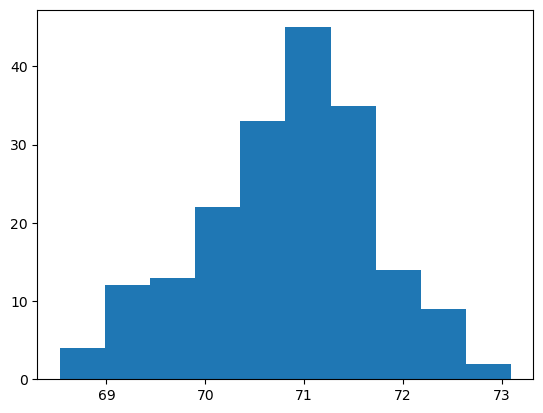

In [10]:
# Plot random normal distribution for Average Score
plt.hist(y)
plt.show()

In [11]:
# Synthesize a poisson distribution for Average Score
p = np.random.default_rng().poisson(mean, 189)
p

array([74, 74, 76, 67, 75, 82, 67, 74, 77, 59, 68, 66, 72, 81, 56, 60, 75,
       65, 77, 81, 72, 71, 87, 78, 61, 60, 72, 74, 73, 73, 74, 76, 58, 60,
       72, 64, 71, 64, 69, 58, 81, 66, 73, 63, 69, 80, 66, 67, 74, 67, 81,
       75, 72, 68, 69, 81, 75, 63, 66, 68, 76, 66, 70, 67, 65, 82, 71, 72,
       80, 68, 67, 80, 77, 84, 59, 58, 83, 74, 68, 74, 69, 74, 69, 78, 74,
       73, 89, 87, 77, 83, 61, 87, 62, 80, 75, 65, 76, 74, 64, 64, 58, 72,
       67, 79, 64, 72, 72, 75, 70, 62, 67, 81, 73, 81, 81, 68, 53, 78, 76,
       55, 76, 76, 75, 75, 66, 60, 77, 64, 71, 70, 69, 68, 77, 60, 64, 66,
       68, 59, 76, 76, 60, 81, 65, 66, 63, 71, 56, 64, 80, 74, 76, 79, 75,
       78, 70, 86, 80, 64, 65, 82, 64, 73, 77, 66, 56, 69, 85, 66, 68, 67,
       78, 93, 69, 69, 60, 72, 67, 81, 80, 69, 61, 76, 72, 66, 60, 80, 74,
       66, 73], dtype=int64)

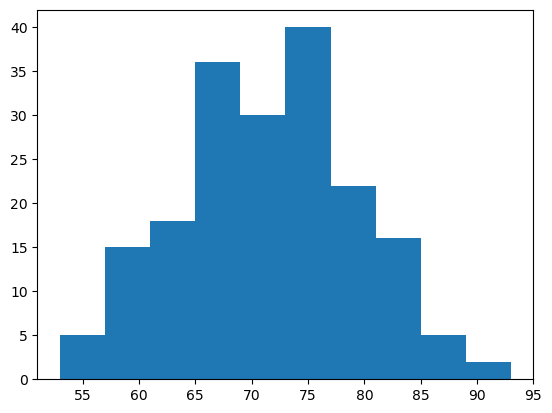

In [12]:
# Plot poisson distribution for Average Score
plt.hist(p)
plt.show()

In [13]:
# https://www.pgatour.com/stats/detail/101
df1 = pd.read_csv('pgatour_golfstats_2022-2023_driving.csv')
df1

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES
0,1,0,28237,Rory McIlroy,326.3,41771,128
1,2,0,51491,Brandon Matthews,321.3,37915,118
2,3,0,52372,Cameron Champ,318.8,47180,148
3,4,0,52453,Nicolai Hojgaard,317.7,29227,92
4,5,0,57366,Cameron Young,316.5,51902,164
...,...,...,...,...,...,...,...
184,185,-2,30927,Brendon Todd,282.8,54300,192
185,186,-2,40058,Zac Blair,282.4,42920,152
186,187,-2,31202,William McGirt,281.0,25292,90
187,188,-2,34409,David Lingmerth,279.2,45789,164


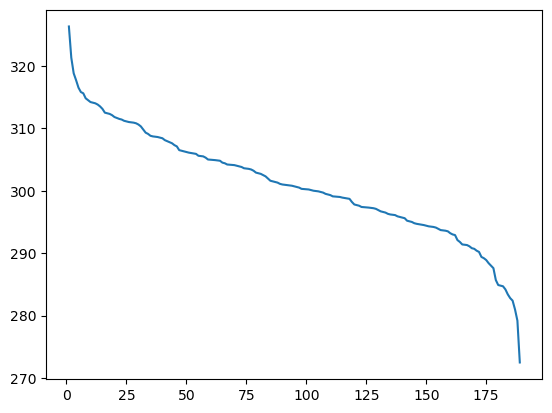

In [14]:
x = df1.RANK
y = df1.AVG
plt.plot(x,y)
plt.show()

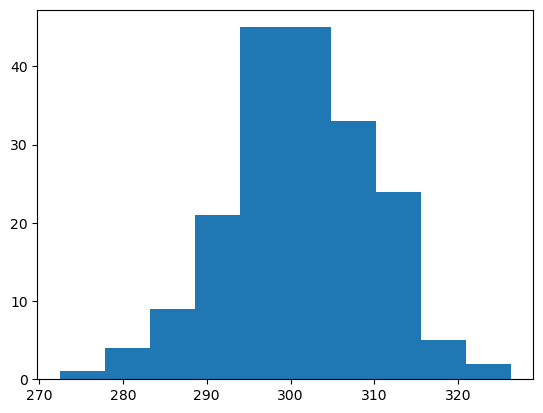

In [15]:
# Plot Driving Distance data from pgatour_golfstats_2022-2023_driving.csv
plt.hist(y, bins=10)
plt.show()

In [16]:
df1.AVG

0      326.3
1      321.3
2      318.8
3      317.7
4      316.5
       ...  
184    282.8
185    282.4
186    281.0
187    279.2
188    272.5
Name: AVG, Length: 189, dtype: float64

In [17]:
std = df1.AVG.std()
std

8.66203975287581

In [18]:
mean = df1.AVG.mean()
mean

300.96402116402106

In [19]:
df1.describe()

,RANK,MOVEMENT,PLAYER_ID,AVG,TOTAL DISTANCE,TOTAL DRIVES
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000
mean,94.719577,-0.904762,39114.994709,300.964021,51175.285714,170.05291
std,54.711144,1.968212,10294.967774,8.662040,9840.011169,32.48334
min,1.000000,-5.000000,12716.000000,272.500000,25292.000000,90.00000
25%,48.000000,-2.000000,31560.000000,295.200000,44589.000000,148.00000
50%,94.000000,-1.000000,36699.000000,300.800000,51338.000000,172.00000
75%,142.000000,0.000000,48117.000000,306.400000,57791.000000,192.00000
max,189.000000,7.000000,59018.000000,326.300000,72978.000000,244.00000


In [20]:
count = df1.count()
count

RANK              189
MOVEMENT          189
PLAYER_ID         189
PLAYER            189
AVG               189
TOTAL DISTANCE    189
TOTAL DRIVES      189
dtype: int64

In [21]:
# Synthesize a random normal distribution for Driving Distance
# I choose mu of 300.5 because this is the average drivage distance in pgatour_golfstats_2022-2023_driving.csv
mu, sigma = 300.96, 8.66 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 189)
s

array([278.8835742 , 305.36183367, 296.82831772, 299.1363726 ,
       301.1530215 , 306.0816048 , 300.20272868, 318.28472349,
       299.09664717, 297.99357187, 282.37593174, 303.15500018,
       289.27123383, 303.40821841, 309.76724034, 295.05209002,
       300.12661443, 291.61380071, 289.89796457, 287.57894296,
       292.93034327, 304.18891547, 289.36480147, 313.19080278,
       313.19892145, 296.48483496, 298.20412712, 304.1312885 ,
       294.94781354, 315.52999147, 292.90016109, 300.08478288,
       288.02086484, 292.35101984, 297.91017817, 313.65545834,
       305.03323615, 303.86468324, 294.00535499, 295.44362505,
       288.44841042, 294.93027961, 303.43537489, 305.40874201,
       287.56134735, 301.00415431, 302.02265189, 306.13331011,
       290.90164808, 298.51369182, 292.1206057 , 301.34451466,
       296.62267285, 305.05991294, 315.91125851, 311.70214182,
       296.958403  , 296.66443843, 302.82501333, 279.21568621,
       312.88372345, 303.65635192, 286.2111514 , 299.49

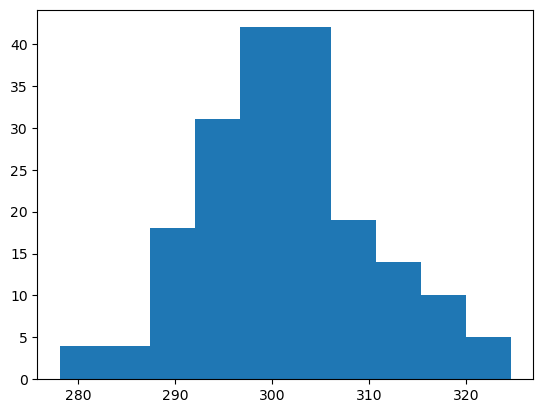

In [22]:
# Plot random normal distribution for Driving Distance
plt.hist(s)
plt.show()

In [23]:
# Synthesize a poisson distribution for Driving Distance
p = np.random.default_rng().poisson(mu,189)
p

array([287, 293, 296, 295, 280, 334, 315, 314, 329, 274, 314, 294, 278,
       306, 278, 308, 304, 313, 308, 307, 317, 301, 298, 297, 299, 305,
       284, 298, 266, 310, 278, 312, 264, 311, 306, 296, 317, 305, 297,
       298, 312, 281, 306, 298, 339, 311, 302, 262, 304, 323, 296, 323,
       287, 275, 311, 312, 305, 310, 326, 325, 288, 293, 290, 301, 298,
       307, 312, 330, 293, 309, 296, 293, 352, 300, 305, 291, 313, 312,
       284, 287, 288, 299, 269, 305, 287, 284, 311, 326, 331, 321, 286,
       322, 304, 274, 273, 323, 326, 303, 296, 317, 305, 307, 327, 266,
       296, 290, 296, 340, 292, 332, 306, 320, 288, 302, 303, 321, 315,
       302, 305, 325, 297, 288, 265, 322, 304, 321, 294, 288, 283, 316,
       296, 333, 319, 292, 309, 308, 312, 320, 276, 285, 298, 295, 291,
       303, 306, 309, 293, 299, 287, 268, 290, 317, 313, 289, 292, 290,
       288, 331, 333, 337, 284, 272, 326, 310, 325, 299, 279, 294, 310,
       293, 304, 273, 280, 302, 336, 295, 310, 303, 301, 321, 31

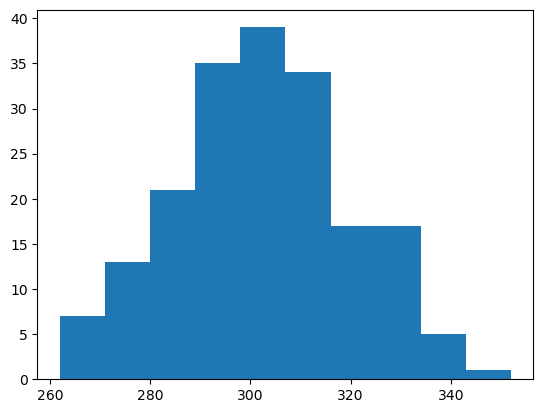

In [24]:
# Plot poisson distribution for Driving Distance
plt.hist(p)
plt.show()

In [25]:
dataframe1 = pd.read_excel('dpworldtour_2022-2023_scoringaverage.xlsx')
dataframe1

,1,Unnamed: 1,"MCILROY, Rory",30,68.8,DP World Tour
0,2,NaN,"BJÖRK, Alexander",88,69.53,DP World Tour
1,3,NaN,"HØJGAARD, Nicolai",61,69.59,DP World Tour
2,4,NaN,"KIMSEY, Nathan",76,69.74,DP World Tour
3,5,NaN,"OLESEN, Thorbjørn",84,69.80,DP World Tour
4,6,NaN,"MERONK, Adrian",77,69.81,DP World Tour
...,...,...,...,...,...,...
168,170,NaN,"MURPHY, John",51,73.86,DP World Tour
169,171,NaN,"LI, Haotong",43,74.07,DP World Tour
170,172,NaN,"WINDRED, Blake",34,74.18,DP World Tour
171,173,NaN,"CHENGYAO, Ma",40,74.83,DP World Tour


In [26]:
dataframe2 = pd.read_excel('Shane Lowry_2022-2-23_Results_time-series.xlsx')
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN


In [27]:
dataframe2['datetime'] = pd.to_datetime(dataframe2['DATE'])
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16,datetime
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN,2022-10-23
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-,2022-12-04
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN,2023-02-12
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN,2023-02-19
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN,2023-02-26
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN,2023-03-05
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN,2023-03-12
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN,2023-03-26
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-,2023-04-09
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN,2023-04-16


In [28]:
dataframe2['datetime']

0    2022-10-23
1    2022-12-04
2    2023-02-12
3    2023-02-19
4    2023-02-26
5    2023-03-05
6    2023-03-12
7    2023-03-26
8    2023-04-09
9    2023-04-16
10   2023-05-07
11   2023-05-21
12   2023-06-04
13   2023-06-11
14   2023-06-18
15   2023-06-25
16   2023-07-16
17   2023-07-23
18   2023-08-06
19   2023-10-01
Name: datetime, dtype: datetime64[ns]

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

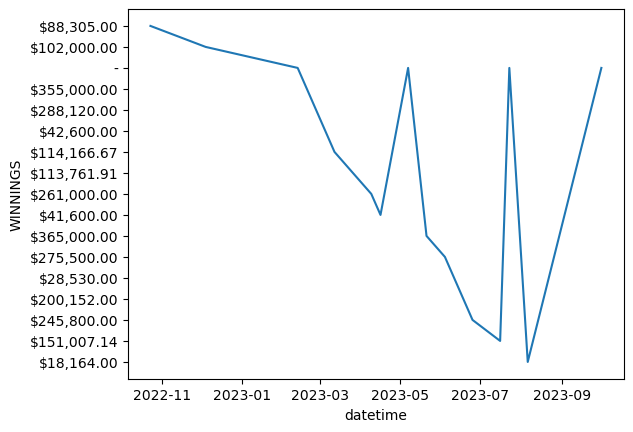

In [29]:
import seaborn as sns
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [30]:
dti = pd.date_range("2022-10-23", periods=52, freq="W")
len(dti)
dti

DatetimeIndex(['2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25', '2023-01-01', '2023-01-08',
               '2023-01-15', '2023-01-22', '2023-01-29', '2023-02-05',
               '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05',
               '2023-03-12', '2023-03-19', '2023-03-26', '2023-04-02',
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14', '2023-05-21', '2023-05-28',
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20',
               '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
               '2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [31]:
winnings = dataframe2['WINNINGS']
winnings

0      $88,305.00
1     $102,000.00
2               -
3     $355,000.00
4     $288,120.00
5      $42,600.00
6     $114,166.67
7     $113,761.91
8     $261,000.00
9      $41,600.00
10              -
11    $365,000.00
12    $275,500.00
13     $28,530.00
14    $200,152.00
15    $245,800.00
16    $151,007.14
17              -
18     $18,164.00
19              -
Name: WINNINGS, dtype: object

In [32]:
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\$':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\,':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\-':'0'}, regex = True)
winnings = dataframe2['WINNINGS']
winnings

0      88305.00
1     102000.00
2             0
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10            0
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17            0
18     18164.00
19            0
Name: WINNINGS, dtype: object

In [33]:
dataframe2['WINNINGS'] = pd.to_numeric(dataframe2['WINNINGS'])
dataframe2['WINNINGS']

0      88305.00
1     102000.00
2          0.00
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10         0.00
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17         0.00
18     18164.00
19         0.00
Name: WINNINGS, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

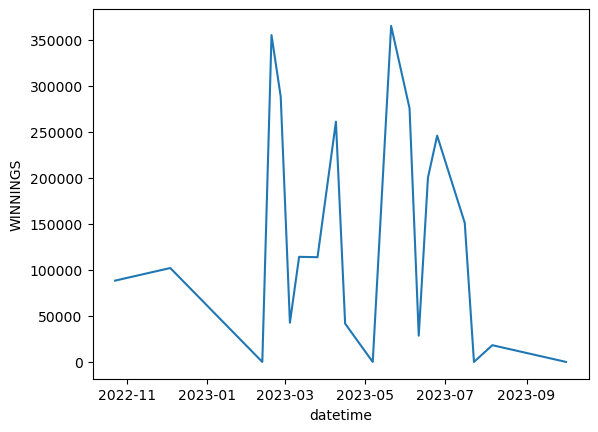

In [34]:
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [35]:
mean = dataframe2.WINNINGS.mean()
mean

134535.336

In [36]:
sigma = dataframe2.WINNINGS.std()
sigma

124907.89379401015

In [37]:
rng = np.random.default_rng() 
d = rng.poisson(mean, len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,134420
2022-10-30,133946
2022-11-06,134533
2022-11-13,134292
2022-11-20,135175


In [38]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,134420
2022-10-30,133946
2022-11-06,134533
2022-11-13,134292
2022-11-20,135175


<AxesSubplot:ylabel='WINNINGS'>

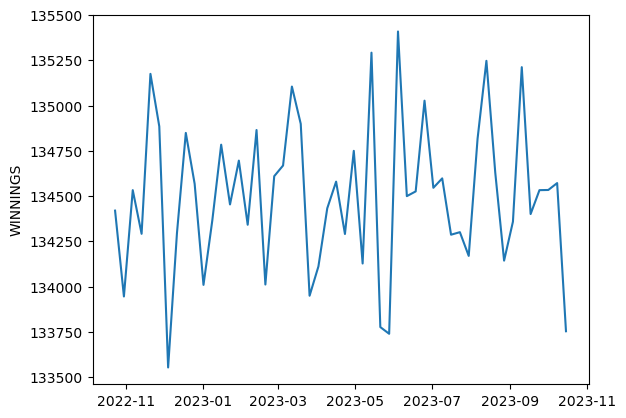

In [39]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

<AxesSubplot:>

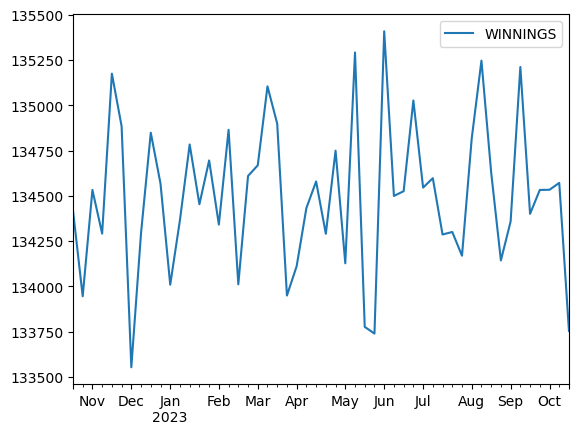

In [40]:
df.plot(y="WINNINGS")

In [41]:
d = rng.normal(mean,sigma,len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,154510.216249
2022-10-30,140937.391532
2022-11-06,-34827.554241
2022-11-13,194979.010658
2022-11-20,102325.302222


In [42]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,154510.216249
2022-10-30,140937.391532
2022-11-06,-34827.554241
2022-11-13,194979.010658
2022-11-20,102325.302222


<AxesSubplot:>

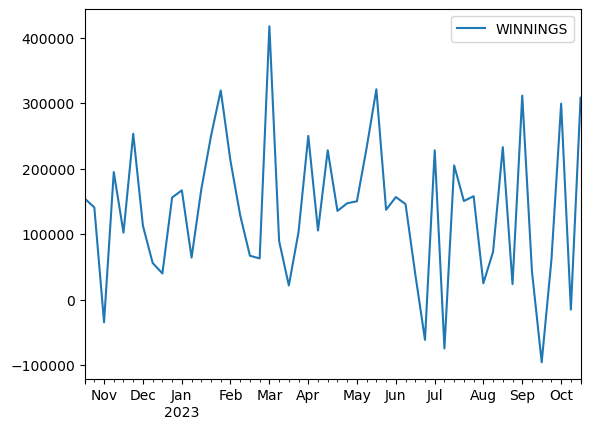

In [43]:
df.plot(y="WINNINGS")

<AxesSubplot:ylabel='WINNINGS'>

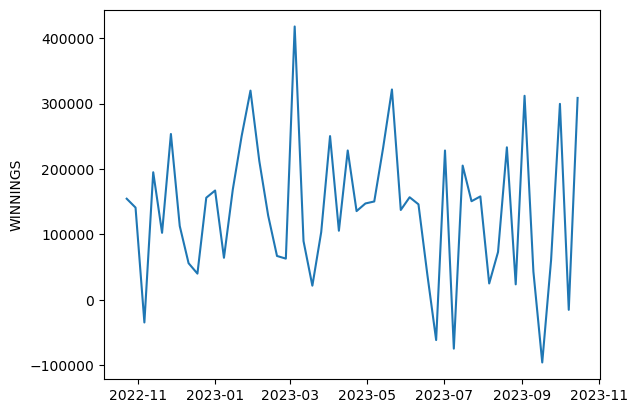

In [63]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

In [44]:
def f(x):
  A = 1.0 / np.sqrt(2.0 * np.pi)
  B = np.exp(-(x**2) / 2.0)
  return A * B

In [45]:
f(0.0)

0.3989422804014327

In [46]:
f(3.0)

0.0044318484119380075

In [47]:
f(300.0)

0.0

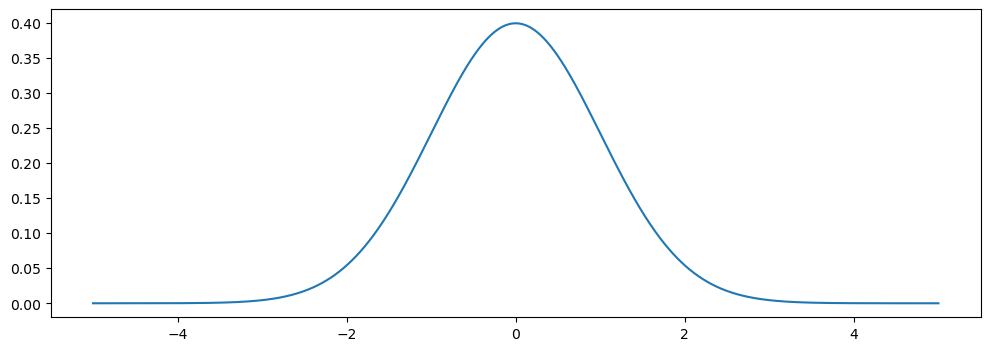

In [48]:
# Range of x values for plotting.
x = np.linspace(-5.0, 5.0, 1001)

# Create empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
ax.plot(x, f(x));

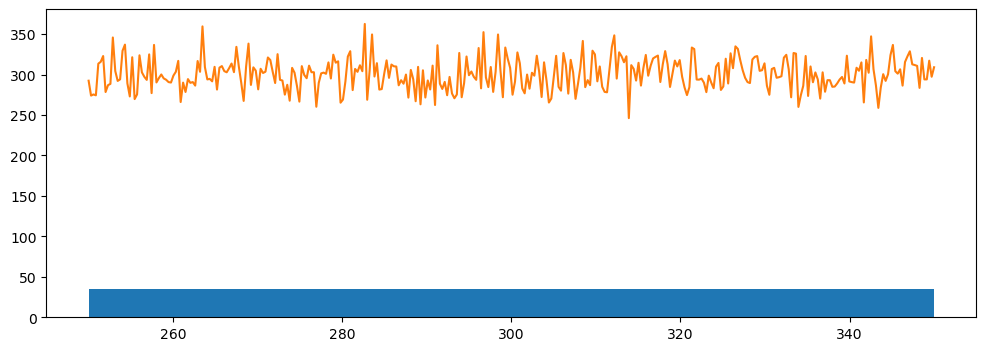

In [49]:
# Range of x values for plotting.
x = np.linspace(250.0, 350.0,350)
y=  np.random.normal(300,20,350)

# Create empty plot.
fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
ax.hist(x)

# Plot histogram of randomly generated normal values from above.
ax.plot(x, y)

plt.show()

In [50]:
import numpy as np
rng.integers(10,25)

19

In [51]:
rng.integers(100, size=10)

array([ 1, 81, 93, 71, 58, 83, 25, 96, 70, 38], dtype=int64)

In [52]:
rng.integers(50,100, size=10)

array([84, 88, 51, 58, 82, 87, 97, 77, 95, 88], dtype=int64)

In [53]:
rng.integers(100, size=(2,4))

array([[ 8, 61, 43, 22],
       [59,  0, 23, 70]], dtype=int64)

In [54]:
rng.random()

0.19457278535471556

In [55]:
rng.random(5)

array([0.734726  , 0.84816044, 0.26354195, 0.87070485, 0.59485546])

In [56]:
rng.random((5,4))

array([[0.93884535, 0.94122278, 0.40692989, 0.74050807],
       [0.58200203, 0.80689865, 0.03779134, 0.22430667],
       [0.2154028 , 0.77811507, 0.90461423, 0.33981909],
       [0.83068819, 0.25911107, 0.98762406, 0.82991971],
       [0.71211561, 0.24824532, 0.56894285, 0.03062686]])

In [57]:
x = rng.random(1000000)
x

array([0.59622424, 0.00290357, 0.10593549, ..., 0.5235309 , 0.548402  ,
       0.51736599])

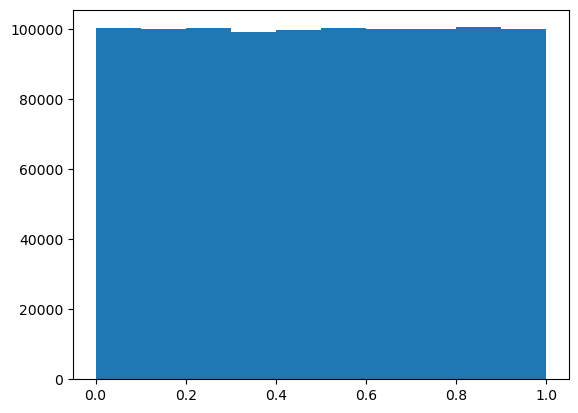

In [58]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [59]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


In [60]:
rng = np.random.default_rng(seed=44)
x = rng.integers(10)
print(x)

6


In [61]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [62]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]
